# ResNet50

In [1]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

# num_classes is the number of categories your model chooses between for each prediction
num_classes = 6
resnet_weights_path = '/Users/billyzhaoyh/Desktop/StillGood/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add (Dense(1024,activation='relu'))
my_new_model.add (Dense(512,activation='relu'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# The value below is either True or False.  If you choose the wrong answer, your modeling results
# won't be very good.  Recall whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False

Using TensorFlow backend.


In [2]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

#data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
#use data augmentation techniques
data_generator= ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)


train_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Train',
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Val',
        class_mode='categorical')

test_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Test',
        class_mode='categorical')

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]


Found 843 images belonging to 6 classes.
Found 104 images belonging to 6 classes.
Found 108 images belonging to 6 classes.


In [4]:
my_new_model.fit_generator(
        train_generator,
        epochs=1,
        validation_data=validation_generator,
        callbacks=callbacks,
        validation_steps=1)

Epoch 1/1
27/27 [==============================] - 146s 5s/step - loss: 1.1747 - acc: 0.6664 - val_loss: 0.6010 - val_acc: 0.9688

In [5]:
predictions=my_new_model.predict_generator(test_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

In [12]:
my_new_model.evaluate_generator(generator=test_generator)

[0.6194531851344638, 0.9537037059112832]

In [14]:
my_new_model.metrics_names


['loss', 'acc']

In [15]:
import numpy as np
predicted_class_indices=np.argmax(predictions,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
results = [labels[k] for k in predicted_class_indices]


In [16]:
print(results)

['Lemon', 'Lemon', 'Carrot', 'Garlic', 'Garlic', 'Onion', 'Carrot', 'Onion', 'Potato', 'Onion', 'Garlic', 'Garlic', 'Potato', 'Onion', 'Carrot', 'Lemon', 'Lemon', 'Onion', 'Garlic', 'Potato', 'Onion', 'Onion', 'Lime', 'Potato', 'Carrot', 'Lime', 'Lemon', 'Carrot', 'Lime', 'Garlic', 'Garlic', 'Garlic', 'Potato', 'Onion', 'Lemon', 'Potato', 'Carrot', 'Onion', 'Lime', 'Onion', 'Carrot', 'Onion', 'Garlic', 'Potato', 'Lime', 'Garlic', 'Potato', 'Garlic', 'Lemon', 'Onion', 'Carrot', 'Carrot', 'Garlic', 'Onion', 'Lemon', 'Lime', 'Onion', 'Onion', 'Garlic', 'Carrot', 'Carrot', 'Lemon', 'Garlic', 'Onion', 'Onion', 'Potato', 'Garlic', 'Carrot', 'Lemon', 'Garlic', 'Lime', 'Lemon', 'Onion', 'Onion', 'Lemon', 'Onion', 'Onion', 'Onion', 'Onion', 'Garlic', 'Potato', 'Onion', 'Garlic', 'Lemon', 'Lime', 'Garlic', 'Onion', 'Lemon', 'Carrot', 'Lime', 'Onion', 'Potato', 'Lime', 'Lemon', 'Lemon', 'Carrot', 'Potato', 'Garlic', 'Onion', 'Garlic', 'Garlic', 'Lemon', 'Lemon', 'Lemon', 'Onion', 'Potato', 'Lemon

In [17]:
y_true=test_generator.classes
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
true_values=[labels[k] for k in y_true]

In [29]:
y_true=test_generator.classes
print(y_true)
print(test_generator.class_indices)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
{'Carrot': 0, 'Garlic': 1, 'Lemon': 2, 'Lime': 3, 'Onion': 4, 'Potato': 5}


In [31]:
x,y = test_generator.next()

In [33]:
y

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0.

In [30]:
print(true_values)

['Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Carrot', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Garlic', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lemon', 'Lime', 'Lime', 'Lime', 'Lime', 'Lime', 'Lime', 'Lime', 'Lime', 'Lime', 'Lime', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Onion', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato', 'Potato'

In [19]:
print(np.c_[results, true_values])

[['Lemon' 'Carrot']
 ['Lemon' 'Carrot']
 ['Carrot' 'Carrot']
 ['Garlic' 'Carrot']
 ['Garlic' 'Carrot']
 ['Onion' 'Carrot']
 ['Carrot' 'Carrot']
 ['Onion' 'Carrot']
 ['Potato' 'Carrot']
 ['Onion' 'Carrot']
 ['Garlic' 'Carrot']
 ['Garlic' 'Carrot']
 ['Potato' 'Carrot']
 ['Onion' 'Carrot']
 ['Carrot' 'Carrot']
 ['Lemon' 'Garlic']
 ['Lemon' 'Garlic']
 ['Onion' 'Garlic']
 ['Garlic' 'Garlic']
 ['Potato' 'Garlic']
 ['Onion' 'Garlic']
 ['Onion' 'Garlic']
 ['Lime' 'Garlic']
 ['Potato' 'Garlic']
 ['Carrot' 'Garlic']
 ['Lime' 'Garlic']
 ['Lemon' 'Garlic']
 ['Carrot' 'Garlic']
 ['Lime' 'Garlic']
 ['Garlic' 'Garlic']
 ['Garlic' 'Garlic']
 ['Garlic' 'Garlic']
 ['Potato' 'Garlic']
 ['Onion' 'Garlic']
 ['Lemon' 'Garlic']
 ['Potato' 'Lemon']
 ['Carrot' 'Lemon']
 ['Onion' 'Lemon']
 ['Lime' 'Lemon']
 ['Onion' 'Lemon']
 ['Carrot' 'Lemon']
 ['Onion' 'Lemon']
 ['Garlic' 'Lemon']
 ['Potato' 'Lemon']
 ['Lime' 'Lemon']
 ['Garlic' 'Lemon']
 ['Potato' 'Lemon']
 ['Garlic' 'Lemon']
 ['Lemon' 'Lemon']
 ['Onion' 'Le

In [20]:
#now calculate the prediction accuracy
count=0 #number of accurate predictions
n=len(results)
for i in range(n):
    if (results[i]==true_values[i]):
        count+=1
        print(count)
test_accuracy=count/n
print('the test accuracy is {}, out of total {} test images'.format(test_accuracy,n))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
the test accuracy is 0.19444444444444445, out of total 108 test images


[0. 0. 0. 0. 1. 0.]


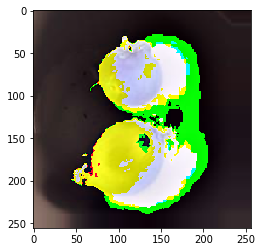

[0. 0. 0. 0. 1. 0.]


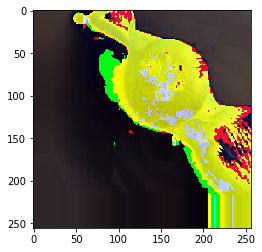

[0. 0. 0. 0. 0. 1.]


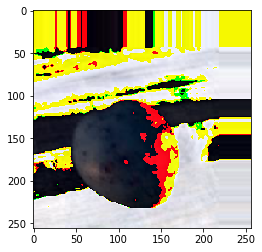

[0. 0. 1. 0. 0. 0.]


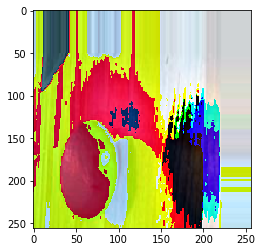

[0. 1. 0. 0. 0. 0.]


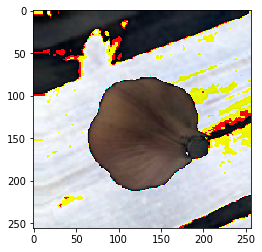

[0. 0. 1. 0. 0. 0.]


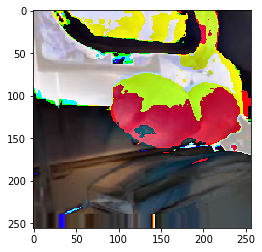

[0. 0. 0. 0. 1. 0.]


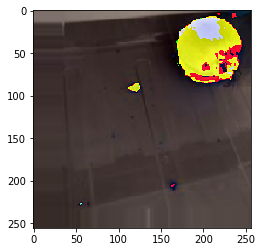

[0. 0. 0. 0. 1. 0.]


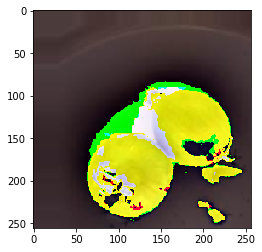

[0. 0. 0. 1. 0. 0.]


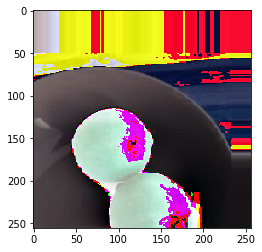

[1. 0. 0. 0. 0. 0.]


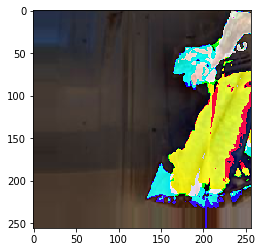

In [26]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

x,y = train_generator.next()
for i in range(0,10):
    image = x[i]
    label = y[i]
    print (label)
    plt.imshow(image.astype('uint8'))
    plt.show()

['Potato']


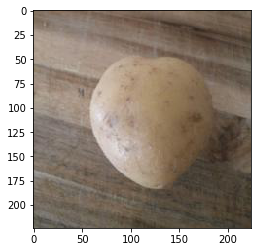

In [38]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow
%matplotlib inline

img_path = '/Users/billyzhaoyh/Desktop/StillGood/Data/Test/Potato/IMG_20190123_103508.jpg'
img = image.load_img(img_path, target_size=(224, 224))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred=my_new_model.predict(x)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

print(predictions)

In [ ]:
#save the model to json and ship it out
# serialize model to JSON
import os
model_json = my_new_model.to_json()
with open("Prototype1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
my_new_model.save_weights("Prototype1.h5")
print("Saved model to disk")

# Benchmark ResNet50 with just popping out the layer


In [1]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

# num_classes is the number of categories your model chooses between for each prediction
num_classes = 9
resnet_weights_path = '/Users/billyzhaoyh/Desktop/StillGood/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

ResNet_bm = Sequential()
ResNet_bm.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
ResNet_bm.add(Dense(num_classes, activation='softmax'))

# The value below is either True or False.  If you choose the wrong answer, your modeling results
# won't be very good.  Recall whether the first layer should be trained/changed or not.
ResNet_bm.layers[0].trainable = True

ResNet_bm.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

#data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
#use data augmentation techniques
data_generator= ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)


train_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Train',
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Val',
        class_mode='categorical')

test_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Test',
        class_mode='categorical')

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=1),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]


Using TensorFlow backend.


Found 1658 images belonging to 9 classes.
Found 207 images belonging to 9 classes.
Found 211 images belonging to 9 classes.


In [2]:
ResNet_bm.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks=callbacks,
        validation_steps=1)

Epoch 1/10
52/52 [==============================] - 1249s 24s/step - loss: 0.4815 - acc: 0.8901 - val_loss: 0.0332 - val_acc: 1.0000

In [4]:
ResNet_bm.evaluate_generator(generator=test_generator)

[0.004855358403758697, 1.0]

In [3]:
#save the model to json and ship it out
# serialize model to JSON
import os
model_json = ResNet_bm.to_json()
with open("ResNetbm_v2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
ResNet_bm.save_weights("ResNetbm_v2.h5")
print("Saved model to disk")

Saved model to disk


In [5]:
#this way of saving does not seem to work
ResNet_bm.save('tf_serving_keras_resnetbm.h5')

[[9.9997818e-01 6.4629779e-07 1.5829307e-06 9.8942655e-07 3.2766293e-06
  2.8598190e-06 9.3806783e-08 1.1009892e-05 1.4456938e-06]]
['Apple']
{0: 'Apple', 1: 'Broccoli', 2: 'ButternutSquash', 3: 'Carrot', 4: 'Garlic', 5: 'Lemon', 6: 'Lime', 7: 'Onion', 8: 'Potato'}


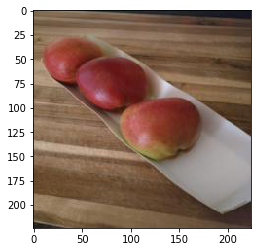

In [7]:
import numpy as np
from keras.preprocessing import image
from matplotlib.pyplot import imshow
%matplotlib inline

img_path = '/Users/billyzhaoyh/Desktop/StillGood/Data/Test/Apple/IMG_20190208_090305.jpg'
img = image.load_img(img_path, target_size=(224, 224))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred=ResNet_bm.predict(x)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(pred)
print(predictions)
print(labels)

# Benchmark inception network with just popping out the top layer

In [11]:
from tensorflow.python.keras.applications import InceptionV3
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

# num_classes is the number of categories your model chooses between for each prediction
num_classes = 6
inception_weights_path = '/Users/billyzhaoyh/Desktop/StillGood/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

inception = Sequential()
inception.add(InceptionV3(include_top=False, pooling='avg', weights=inception_weights_path))
inception.add(Dense(num_classes, activation='softmax'))

# The value below is either True or False.  If you choose the wrong answer, your modeling results
# won't be very good.  Recall whether the first layer should be trained/changed or not.
inception.layers[0].trainable = False

inception.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.python.keras.applications.inception_v3 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 299

#data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
#use data augmentation techniques
data_generator= ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)


train_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Train',
        class_mode='categorical',target_size=(image_size, image_size))

validation_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Val',
        class_mode='categorical',target_size=(image_size, image_size))

test_generator = data_generator.flow_from_directory(
        '/Users/billyzhaoyh/Desktop/StillGood/Data/Test',
        class_mode='categorical',target_size=(image_size, image_size))

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=1),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]


Found 843 images belonging to 6 classes.
Found 104 images belonging to 6 classes.
Found 108 images belonging to 6 classes.


In [12]:
inception.fit_generator(
        train_generator,
        epochs=10,
        validation_data=validation_generator,
        callbacks=callbacks,
        validation_steps=1)

Epoch 1/10
27/27 [==============================] - 165s 6s/step - loss: 1.6039 - acc: 0.3593 - val_loss: 1.3877 - val_acc: 0.5000

In [13]:
inception.evaluate_generator(generator=test_generator)

[0.4962007524790587, 0.9166666688742461]